dataset ;
https://www.kaggle.com/datasets/tongpython/cat-and-dog

In [1]:
import torch 
import torch.nn as nn
import torch.optim as optim 
import torchvision.datasets as dataset
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torch.nn.functional as f
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor


In [5]:
train_path= r"C:\Users\Amir\Desktop\cnn catdog pytorch\archive_3\training_set\training_set"
test_path=  r"C:\Users\Amir\Desktop\cnn catdog pytorch\archive_3\test_set\test_set"

In [14]:
size=224
transform = transforms.Compose([
    transforms.Resize((size, size)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Corrected line
])

In [15]:
train_ds= dataset.ImageFolder(root=train_path, transform=transform)
test_ds= dataset.ImageFolder(root=test_path, transform=transform)

In [16]:
train_ds.class_to_idx

{'cats': 0, 'dogs': 1}

In [17]:
train_ds.classes

['cats', 'dogs']

In [18]:
Batch_size=32 
train_dl=DataLoader(dataset=train_ds, batch_size=Batch_size , shuffle=True)
test_dl=DataLoader(dataset=test_ds, batch_size=Batch_size , shuffle=True)

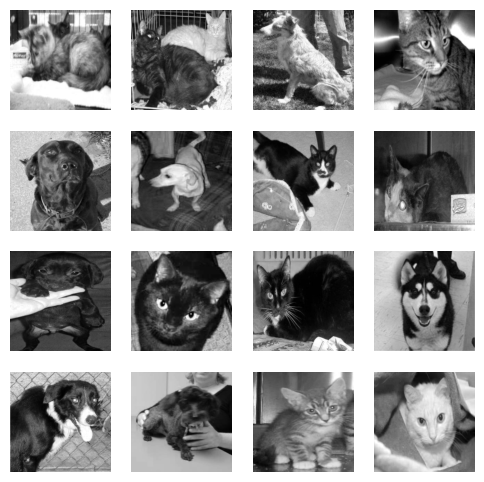

In [22]:
image ,target = next(iter(train_dl))
plt.figure(figsize=(6,6))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(image[i,0], cmap='gray')
    plt.axis('off')
plt.show()

In [24]:
class CNN (nn.Module):
    def __init__(self,input_channel=3, num_classes=10):
        super(CNN,self).__init__()
        self.conv=nn.Sequential(
            nn.Conv2d(3,16,3,1,1),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
            nn.Conv2d(16,32,3,1,1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)

        )
        
        self.classifier=nn.Sequential(
            nn.Flatten(),
            nn.Linear(56*56*32,100),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(100,num_classes)



        )
   
    def forward(self,x):
        out=self.conv(x)
        out=self.classifier(out)
       
        return out

In [25]:
device= 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [26]:
model=CNN().to(device)
model

CNN(
  (conv): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=100352, out_features=100, bias=True)
    (2): ReLU()
    (3): Dropout(p=0.3, inplace=False)
    (4): Linear(in_features=100, out_features=10, bias=True)
  )
)

In [27]:
optimizer= optim.SGD(model.parameters(), lr=0.001)

In [28]:
criterion = nn.CrossEntropyLoss() 

In [30]:
epochs=20 

for i in range(epochs): 
    sumloss=0
    for idx, (image,label) in enumerate(train_dl): 
        image=image.to(device)
        label=label.to(device)
        
        optimizer.zero_grad()
        score=model(image)
        loss=criterion(score ,label)
        sumloss+=loss
        loss.backward()
        optimizer.step()
    print(f'loss in epoch {i+1} is equal to {sumloss}')

loss in epoch 1 is equal to 148.53436279296875
loss in epoch 2 is equal to 139.00778198242188
loss in epoch 3 is equal to 128.5486602783203
loss in epoch 4 is equal to 119.29000091552734
loss in epoch 5 is equal to 112.17880249023438
loss in epoch 6 is equal to 103.49559020996094
loss in epoch 7 is equal to 93.53466796875
loss in epoch 8 is equal to 88.0430679321289
loss in epoch 9 is equal to 78.03360748291016
loss in epoch 10 is equal to 70.57376098632812
loss in epoch 11 is equal to 64.67353057861328
loss in epoch 12 is equal to 55.1950569152832
loss in epoch 13 is equal to 53.27151107788086
loss in epoch 14 is equal to 45.91581344604492
loss in epoch 15 is equal to 39.580360412597656
loss in epoch 16 is equal to 36.77767562866211
loss in epoch 17 is equal to 30.279415130615234
loss in epoch 18 is equal to 28.46439552307129
loss in epoch 19 is equal to 22.804277420043945
loss in epoch 20 is equal to 21.729507446289062


In [31]:
def checkaccuracy (dataloader, model): 
  
    
    num_correct=0
    num_samples=0

    model.eval()

    with torch.no_grad():
        for x,y in dataloader:
            x=x.to(device)
            y=y.to(device)

            
            score=model(x)

            _,pred=score.max(1)
            num_correct+=(pred==y).sum()
            num_samples+=len(y)

        print(f'accuracy is equal to {num_correct/num_samples} ')
    model.train()

In [32]:
checkaccuracy(train_dl, model)

accuracy is equal to 0.8194878101348877 


In [33]:
checkaccuracy(test_dl, model)

accuracy is equal to 0.6485417485237122 
